In [28]:
import pandas as pd

# Your data
exp_data = [2, 4, 3, 9, 12, 14, 10, 2, 6, 6]
salary_data = [50, 70, 55, 75, 120, 150, 75, 40, 80, 70]

# Create a dataframe
df = pd.DataFrame({'Exp': exp_data, 'Salary': salary_data})

# Display the dataframe
df

,Exp,Salary
0,2,50
1,4,70
2,3,55
3,9,75
4,12,120
5,14,150
6,10,75
7,2,40
8,6,80
9,6,70


In [48]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~Exp",data = df).fit()

In [49]:
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     37.28
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           0.000288
Time:                        21:18:32   Log-Likelihood:                -39.986
No. Observations:                  10   AIC:                             83.97
Df Residuals:                       8   BIC:                             84.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6174      9.124      3.356      0.010       9.577      51.658
Exp            7.0416      1.153      6.106      0.000       4.382       9.701
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.473
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.637
Skew:                          -0.590   Prob(JB):                        0.727
Kurtosis:                       2.631   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 160.0)

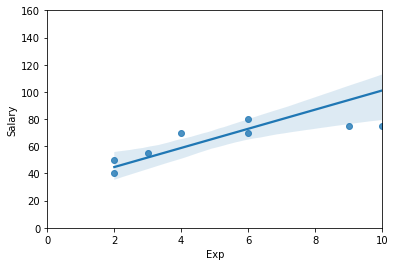

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="Exp", y="Salary", data=df);
plt.xlim(0, 10)  # Set the x-axis limits from 0 to 10
plt.ylim(0, 160)
# Annotate each point with its value
#for i, row in df.iterrows():
#    plt.annotate(f'({row["Exp"]}, {row["Salary"]})', (row["Exp"], row["Salary"]), textcoords="offset points", xytext=(5,5), ha='center')

# Display the plot
#plt.show()

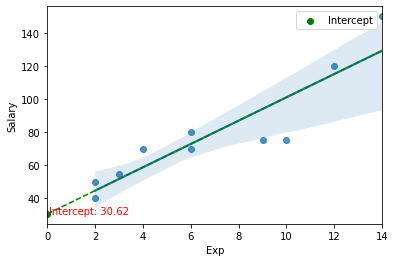

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame containing "Exp" and "Salary" columns

# Create a regplot
sns.regplot(x="Exp", y="Salary", data=df)

# Get the regression coefficients (slope and intercept)
slope, intercept = np.polyfit(df['Exp'], df['Salary'], 1)

# Highlight the intercept value with an annotation
plt.annotate(f'Intercept: {intercept:.2f}', 
             xy=(0.05, intercept), 
             xycoords='data',
             fontsize=10,
             color='red')

# Set x-axis starting point to 0
plt.xlim(0, max(df['Exp']))

# Plot the regression line extended to the y-axis
x_values = np.linspace(0, max(df['Exp']), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, linestyle='--', color='green')

# Highlight the line with a point at the y-axis intercept
plt.scatter(0, intercept, color='green', marker='o', label='Intercept')

# Show the plot
plt.legend()
plt.show()


In [32]:
#Coefficients
model.params

Intercept    30.617359
Exp           7.041565
dtype: float64

In [33]:
#equation
beta_0=30.61
beta_1=7.04
years_of_exp=10
Salary=30.61+7.04*years_of_exp
Salary

101.01

In [44]:
newdata=pd.Series([10,15,5,7,9,20])

In [55]:
data_test=pd.DataFrame(newdata,columns=['Exp'])
data_test

,Exp
0,10
1,15
2,5
3,7
4,9
5,20


In [56]:
predictions=model.predict(data_pred)

In [57]:
predictions

pandas.core.series.Series

In [58]:
predictions=pd.DataFrame(predictions,columns=['Predicted_Salary'])

In [59]:
predictions

,Predicted_Salary
0,101.033007
1,136.240831
2,65.825183
3,79.908313
4,93.991443
5,171.448655


In [63]:
df_merge=pd.concat([data_test,predictions],axis=1)
df_merge

,Exp,Predicted_Salary
0,10,101.033007
1,15,136.240831
2,5,65.825183
3,7,79.908313
4,9,93.991443
5,20,171.448655
